<a href="https://colab.research.google.com/github/arun4589/ML/blob/main/Crop_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

algo->randomforestclassifier,xgboostclf,gradboostclf,lgbclf,catboostclf,logistic,svcclf,logisticreg,

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arun4545","key":"d7f43d352032462a540c4afd72d63bff"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download  siddharthss/crop-recommendation-dataset


Dataset URL: https://www.kaggle.com/datasets/siddharthss/crop-recommendation-dataset
License(s): Attribution 3.0 IGO (CC BY 3.0 IGO)
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 41.7MB/s]


In [4]:
!unzip crop-recommendation-dataset.zip

Archive:  crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Crop_recommendation.csv')

In [12]:
df.sample(4)

,N,P,K,temperature,humidity,ph,rainfall,label
1546,31,130,198,21.801298,92.734467,5.554824,120.058667,apple
689,33,37,19,27.926786,86.554320,7.183190,43.482619,mungbean
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,grapes
972,18,21,35,23.280123,94.943305,6.368561,111.138210,pomegranate


#EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [18]:
df.corr(numeric_only=True)

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


#1

<Axes: ylabel='count'>

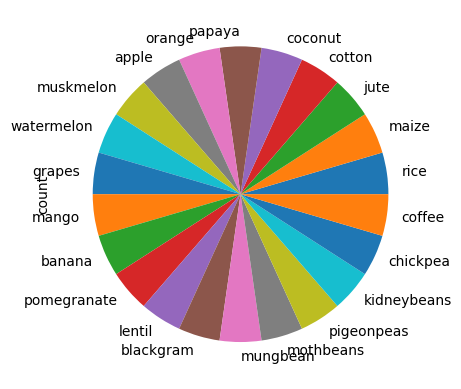

In [21]:
df['label'].value_counts().plot(kind='pie')

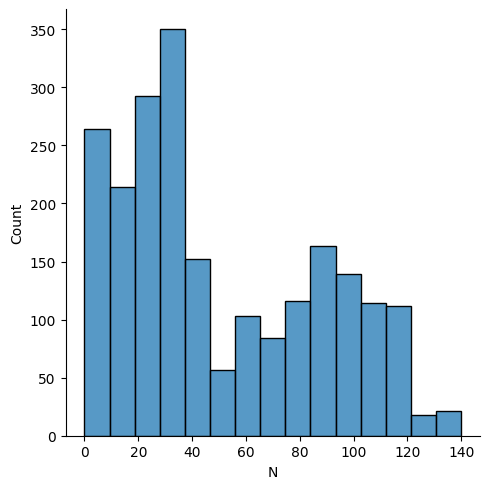

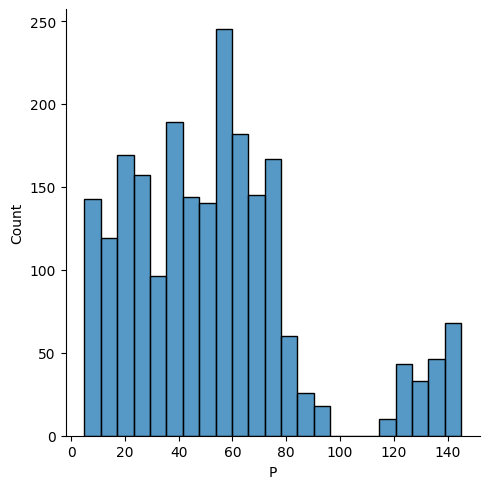

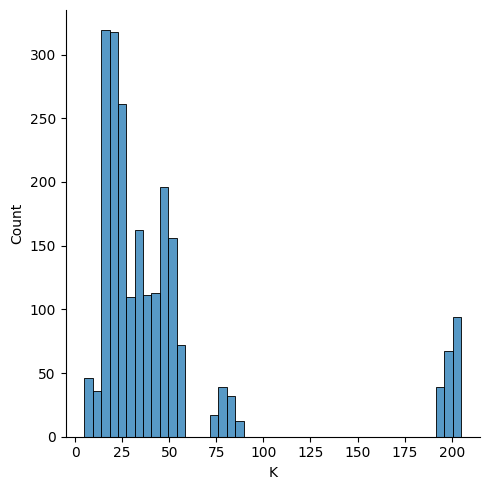

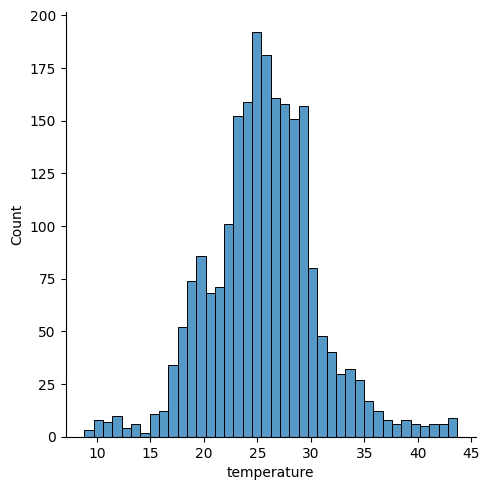

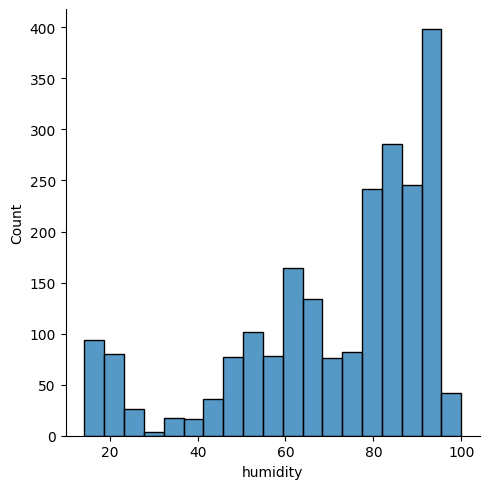

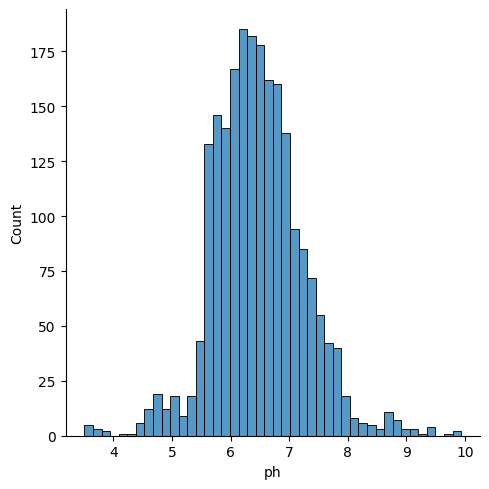

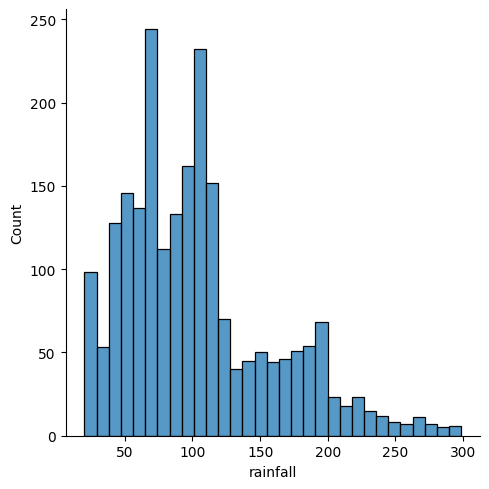

In [25]:
col=df.columns
for i in col[:-1]:

  sns.displot(df[i])

<Axes: xlabel='P', ylabel='Density'>

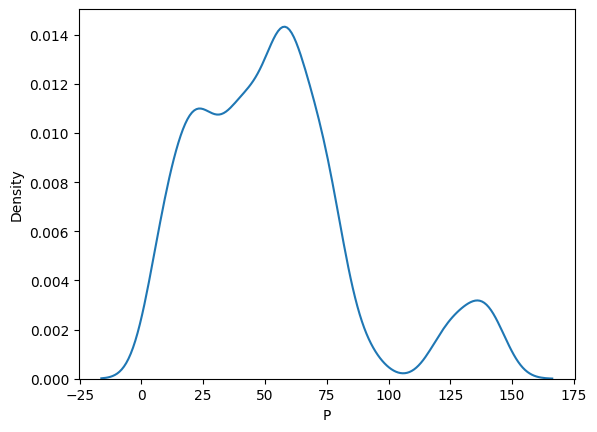

In [33]:
sns.kdeplot(data=df,x='P',)

<Axes: ylabel='temperature'>

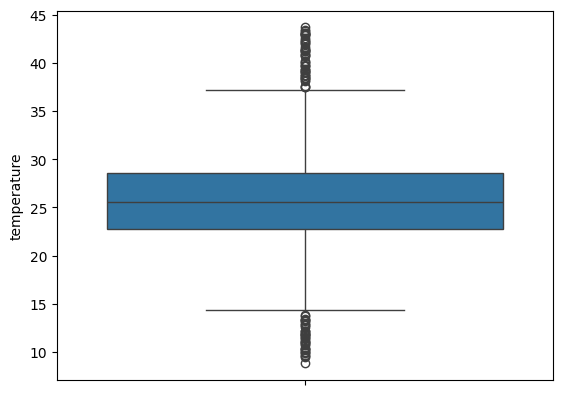

In [42]:

sns.boxplot(df['temperature'])

<Axes: >

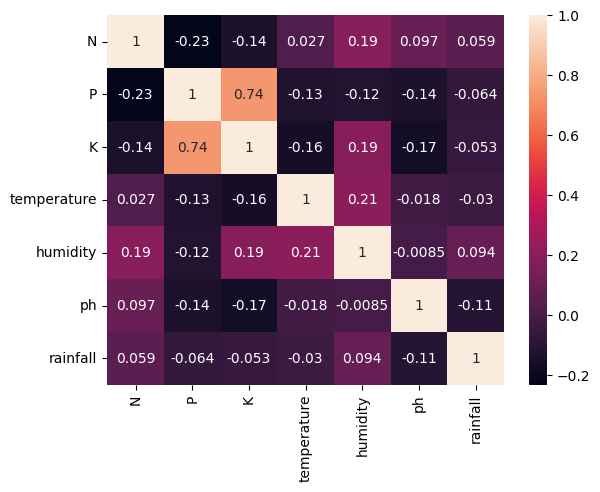

In [44]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='label', ylabel='temperature'>

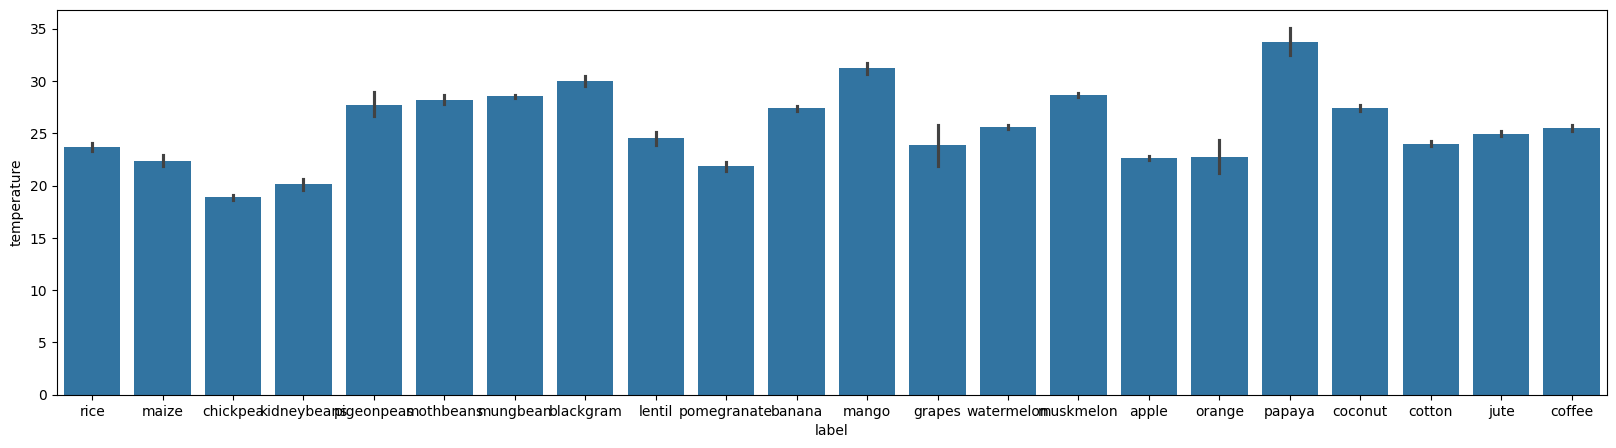

In [55]:
figsize=(20,5)
plt.figure(figsize=figsize)
sns.barplot(x=df['label'],y=df['temperature'])

<Axes: xlabel='label', ylabel='rainfall'>

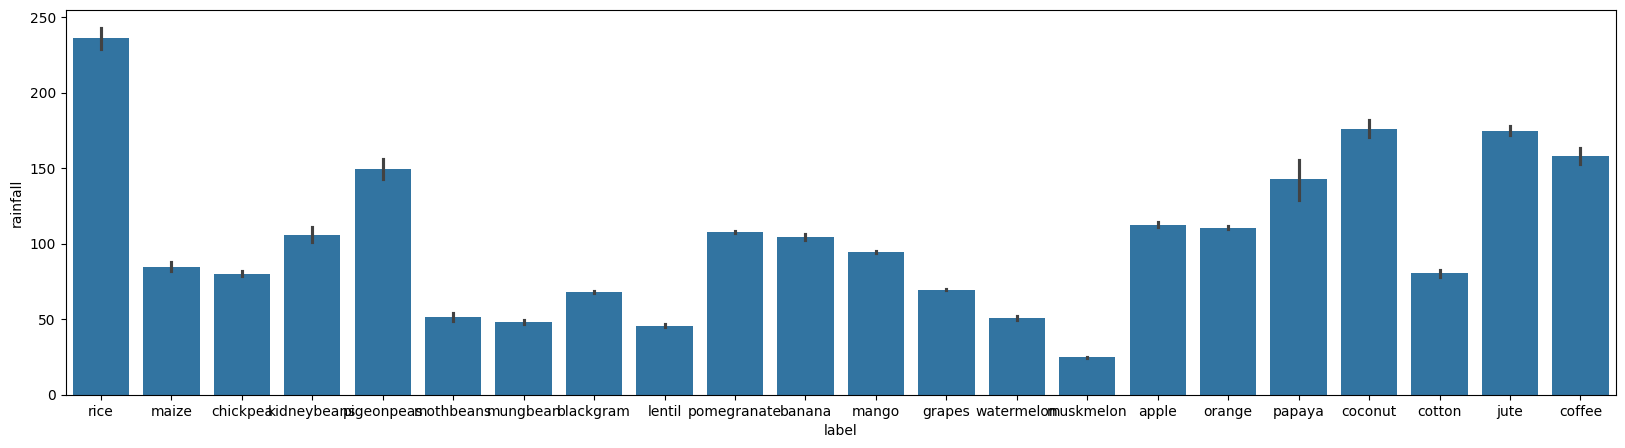

In [57]:
figsize=(20,5)
plt.figure(figsize=figsize)
sns.barplot(x=df['label'],y=df['rainfall'])

#fe

In [7]:
!pip install catboost
!pip install dask[dataframe]
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 14.4 MB/s eta 0:00:00


In [8]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [9]:
y=df['label']
x=df.iloc[:,:-1]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [12]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [13]:
rs=RobustScaler()
x_train_rs=rs.fit_transform(x_train)
x_test_rs=rs.transform(x_test)

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
rf=RandomForestClassifier(n_estimators=200,max_features=1)
rf.fit(x_train_sc,y_train)
y_pred_sc=rf.predict(x_test_sc)
print(accuracy_score(y_test,y_pred_sc))
rf.fit(x_train_rs,y_train)
y_pred_rs=rf.predict(x_test_rs)
print(accuracy_score(y_test,y_pred_rs))

0.9954545454545455
0.9977272727272727


In [16]:
np.mean(cross_val_score(rf,x_train_sc,y_train,cv=5))

0.9931818181818182

In [17]:
xg=XGBClassifier(n_estimators=200, max_depth=1, learning_rate=0.5,)
xg.fit(x_train_sc,y_train)
y_pred_sc=xg.predict(x_test_sc)
print(accuracy_score(y_test,y_pred_sc))
xg.fit(x_train_rs,y_train)
y_pred_rs=xg.predict(x_test_rs)
print(accuracy_score(y_test,y_pred_rs))

0.9977272727272727
0.9977272727272727


In [18]:
gb=GradientBoostingClassifier(n_estimators=200,max_depth=2,learning_rate=0.5)
gb.fit(x_train_sc,y_train)
y_pred_sc=gb.predict(x_test_sc)
print(accuracy_score(y_test,y_pred_sc))
gb.fit(x_train_rs,y_train)
y_pred_rs=gb.predict(x_test_rs)
print(accuracy_score(y_test,y_pred_rs))

0.9977272727272727
0.9954545454545455


In [19]:
lgb=LGBMClassifier(n_estimators=200,max_depth=3,learning_rate=0.1)
lgb.fit(x_train_sc,y_train)
y_pred_sc=lgb.predict(x_test_sc)
print(accuracy_score(y_test,y_pred_sc))
lgb.fit(x_train_rs,y_train)
y_pred_rs=lgb.predict(x_test_rs)
print(accuracy_score(y_test,y_pred_rs))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.210389
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.196403
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.007161
[LightGBM] 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.9977272727272727
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.210389
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.196403
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [20]:
cat=CatBoostClassifier()
cat.fit(x_train_sc,y_train)
y_pred_sc=cat.predict(x_test_sc)
print(accuracy_score(y_test,y_pred_sc))
cat.fit(x_train_rs,y_train)
y_pred_rs=cat.predict(x_test_rs)
print(accuracy_score(y_test,y_pred_rs))

Learning rate set to 0.081441
0:	learn: 2.5095806	total: 81.6ms	remaining: 1m 21s
1:	learn: 2.1509810	total: 106ms	remaining: 52.7s
2:	learn: 1.9027036	total: 128ms	remaining: 42.6s
3:	learn: 1.7062638	total: 151ms	remaining: 37.5s
4:	learn: 1.5357233	total: 178ms	remaining: 35.5s
5:	learn: 1.3931502	total: 204ms	remaining: 33.8s
6:	learn: 1.2731443	total: 226ms	remaining: 32.1s
7:	learn: 1.1713870	total: 249ms	remaining: 30.9s
8:	learn: 1.0812041	total: 272ms	remaining: 29.9s
9:	learn: 1.0016399	total: 294ms	remaining: 29.1s
10:	learn: 0.9269379	total: 317ms	remaining: 28.5s
11:	learn: 0.8674828	total: 346ms	remaining: 28.5s
12:	learn: 0.8122242	total: 369ms	remaining: 28s
13:	learn: 0.7617222	total: 396ms	remaining: 27.9s
14:	learn: 0.7096225	total: 423ms	remaining: 27.8s
15:	learn: 0.6689757	total: 470ms	remaining: 28.9s
16:	learn: 0.6317050	total: 511ms	remaining: 29.6s
17:	learn: 0.5991230	total: 549ms	remaining: 29.9s
18:	learn: 0.5680514	total: 588ms	remaining: 30.3s
19:	learn: 

In [21]:
svc=SVC()
svc.fit(x_train_sc,y_train)
y_pred_sc=svc.predict(x_test_sc)
print(accuracy_score(y_test,y_pred_sc))
svc.fit(x_train_rs,y_train)
y_pred_rs=svc.predict(x_test_rs)
print(accuracy_score(y_test,y_pred_rs))


0.9840909090909091
0.9840909090909091


#assemble

In [31]:
num_p=Pipeline(steps=[
    ('sc',StandardScaler())
])


In [32]:
preprocessor=ColumnTransformer(transformers=[
    ('num',num_p,[0,1,2,3,4,5,6])
])

In [43]:
Pipe=make_pipeline(preprocessor,RandomForestClassifier(n_estimators=200,max_features=1))
pipe_gb=make_pipeline(preprocessor,GradientBoostingClassifier(n_estimators=200,max_depth=2,learning_rate=0.5))
pipe_lgb=make_pipeline(preprocessor,LGBMClassifier(n_estimators=200,max_depth=3,learning_rate=0.1))
pipe_cat=make_pipeline(preprocessor,CatBoostClassifier())



In [44]:
Pipe.fit(x_train,y_train)
y_pred_rf=Pipe.predict(x_test)
print(accuracy_score(y_test,y_pred_rf))

0.9954545454545455


In [45]:
from joblib import dump
dump(Pipe,'model_rf.joblib')

['model_rf.joblib']

In [46]:
from joblib import load
model=load('model_rf.joblib')

In [47]:
y_pred_m=model.predict(x_test)
print(accuracy_score(y_test,y_pred_m))

0.9954545454545455


In [48]:
df.sample(2)

,N,P,K,temperature,humidity,ph,rainfall,label
1131,33,29,34,31.409488,49.217291,6.832980,92.997394,12
2164,92,40,30,23.357232,55.187922,6.026287,171.697695,5


In [53]:
model.predict(np.array([92,40,30,23.35,55.12,6,171.7]).reshape(1,7))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5])

In [54]:
dump(le,'label_encoder.joblib')

['label_encoder.joblib']